In [ ]:
# from google.colab import drive
# drive.mount("/content/drive")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import joblib


In [ ]:
# import pandas as pd

# # Đọc dữ liệu từ file CSV và xử lý lỗi khi đọc
# try:
#   dataset_df_6 = pd.read_csv('/content/chungcu_batdongsan500_7.csv', encoding='utf-16')

# except Exception as e:
#     print("Lỗi khi đọc file CSV:", e)
#     # Không cần gán dataset_df_6 = pd.DataFrame() ở đây

In [ ]:
dataset_df=pd.read_csv('/content/dataset_batdongsan.csv')
# dataset_df_1=dataset_df_1.drop('date_submitted',axis=1)


In [ ]:
dataset_df.head(300)

,title,links,price,area,price_per_m2,bedroom,toilet,location,description,balcony_direction,house_direction,property_legal_document,furniture,date_submitted,Tỉnh,Quận,Phường,Đường
0,"Bán CH có sân Sky Garden 2 Phú Mỹ Hưng Q. 7, D...",https://batdongsan.com.vn/ban-can-ho-chung-cu-...,"5,7 tỷ",131.0,43.51,2.0,2.0,"['Dự án Sky Garden 3', ' Đường Phạm Văn Nghị',...","Bán căn hộ có sân tại Sky garden 2, diện tích ...",Bắc,Nam,Sổ hồng cầm tay.,Full nội thất.,11/04/2024,Hồ Chí Minh,Quận 7,Phường Tân Phong,Đường Phạm Văn Nghị
1,"Chủ ngợp bán Him Lam, 86m2, 2PN 2WC, full nội ...",https://batdongsan.com.vn/ban-can-ho-chung-cu-...,"3,25 tỷ",86.0,37.79,2.0,2.0,"['Dự án Him Lam Chợ Lớn', ' Đường Hậu Giang', ...","Cần bán chung cư Him Lam, Q6 diện tích 86m², 2...",Đông - Nam,Đông,Sổ đỏ/ Sổ hồng,Đầy đủ,17/04/2024,Hồ Chí Minh.,Quận 6,Phường 11,Đường Hậu Giang
2,"Bán căn hộ Flemington, Q11, 87m2, 2 phòng ngủ,...",https://batdongsan.com.vn/ban-can-ho-chung-cu-...,"4,6 tỷ",87.0,52.87,2.0,2.0,"['The Flemington', ' 184', ' Đường Lê Đại Hành...","Bán căn hộ Flemington, địa chỉ: 184 Lê Đại Hàn...",Đông - Nam,Đông,Sổ đỏ/ Sổ hồng,Đầy đủ,17/04/2024,Hồ Chí Minh,Quận 11,Phường 15,Đường Lê Đại Hành
3,Bán căn hộ góc 4pn 161m2 hướng Đông Nam tầng t...,https://batdongsan.com.vn/ban-can-ho-chung-cu-...,70 triệu/m²,161.0,11.27,4.0,3.0,"['Dự án BRG Diamond Residence', ' Đường Lê Văn...",Bán căn hộ 4PN góc giá tốt nhất dự án BRG Lê V...,Đông - Nam,Tây - Nam,Hợp đồng mua bán,Không nội thất,17/04/2024,Hà Nội,Thanh Xuân,Phường Nhân Chính,Đường Lê Văn Lương
4,"Tôi chính chủ bán căn hộ 134m, 4 ngủ, 3vs tại ...",https://batdongsan.com.vn/ban-can-ho-chung-cu-...,"9,5 tỷ",134.0,70.90,4.0,3.0,"['Dự án The Park Home', ' Đường Thành Thái', '...",Tôi chính chủ bán căn hộ 134m tại dự án The Pa...,Đông - Bắc,Tây - Nam,Sổ đỏ/ Sổ hồng,Đầy đủ,17/04/2024,Hà Nội,Cầu Giấy,Phường Dịch Vọng,Đường Thành Thái
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,"Chính chủ bán gấp cắt lỗ, khẳng định rẻ nhất t...",https://batdongsan.com.vn/ban-can-ho-chung-cu-...,Thỏa thuận,73.0,0.00,2.0,2.0,"['Dự án The Pride', ' Đường Tố Hữu', ' Phường ...",Nhà em mới chuyển sang căn 3 ngủ cùng toà nên ...,Tây - Nam,Đông - Bắc,Sổ đỏ/ Sổ hồng,Đầy đủ,17/04/2024,Hà Nội,Hà Đông,Phường La Khê,Đường Tố Hữu
296,"Giá chuẩn căn 3 ngủ Mỹ Đình Plaza 2, Nguyễn Ho...",https://batdongsan.com.vn/ban-can-ho-chung-cu-...,"5,5 tỷ",110.0,50.00,3.0,2.0,"['Dự án Mỹ Đình Plaza 2', ' Đường Nguyễn Hoàng...","Tôi cần bán căn hộ Mỹ Đình Plaza 2, Nguyễn Hoà...",Đông - Nam,Tây - Bắc,Sổ đỏ/ Sổ hồng,Đầy đủ,16/04/2024,Hà Nội,Nam Từ Liêm,Phường Mỹ Đình 2,Đường Nguyễn Hoàng
297,"Chính chủ cần bán căn hộ 2 ngủ, 70m2 dự án Mỹ ...",https://batdongsan.com.vn/ban-can-ho-chung-cu-...,"3,9 tỷ",70.0,55.71,2.0,2.0,"['Dự án Mỹ Đình Plaza 2', ' Đường Nguyễn Hoàng...",Gia đình chuyển lên căn hộ 3 ngủ nên cần chuyể...,Đông - Nam,Tây - Bắc,Sổ đỏ/ Sổ hồng,Đầy đủ,16/04/2024,Hà Nội,Nam Từ Liêm,Phường Mỹ Đình 2,Đường Nguyễn Hoàng
298,2X TỶ penthouse Riverpark Phú Mỹ Hưng DT 334m2...,https://batdongsan.com.vn/ban-can-ho-chung-cu-...,28 tỷ,334.0,83.83,3.0,4.0,"['Dự án Riverpark Residence', ' Đường Nguyễn Đ...",Penthouse Riverpark Residence.\nPhú Mỹ Hưng Q7...,Đông - Nam,Tây - Bắc,Hợp đồng mua bán,Đầy đủ,12/04/2024,Hồ Chí Minh,Quận 7,Phường Tân Phong,Đường Nguyễn Đức Cảnh


In [ ]:
# Data clean
dataset_df['area'] = dataset_df['area'].replace('[^\d.]', '', regex=True).astype(float)
dataset_df['price_per_m2'].replace(',', '.', regex=True, inplace=True)
dataset_df['price_per_m2'] = dataset_df['price_per_m2'].replace('[^\d.]', '', regex=True).astype(float)



In [ ]:

dataset_df['price_per_m2'] = dataset_df['price_per_m2'].astype(float)

dataset_df['price_per_m2'] = dataset_df['price_per_m2'].astype(float)

dataset_df = dataset_df[dataset_df['location'] != 0]



dataset_df['bedroom'] = dataset_df['bedroom'].replace('[^\d.]', '', regex=True).astype(float)
dataset_df['toilet'] = dataset_df['toilet'].replace('[^\d.]', '', regex=True).astype(float)

dataset_df['balcony_direction'] = dataset_df['balcony_direction'].replace('0', pd.NA, regex=False)
dataset_df['house_direction'] = dataset_df['house_direction'].replace('0', pd.NA, regex=False)
dataset_df['furniture'] = dataset_df['furniture'].replace('0', pd.NA, regex=False)
dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('0', pd.NA, regex=False)


dataset_df = dataset_df.dropna(subset=['balcony_direction'])
dataset_df = dataset_df.dropna(subset=['house_direction'])
dataset_df = dataset_df.dropna(subset=['furniture'])

dataset_df['location']=dataset_df['location'].apply(lambda x: x.split(",") )
dataset_df= dataset_df.reset_index(drop=True)


In [ ]:
dataset_df['bedroom'].value_counts()

bedroom
2.0    4802
3.0    3091
1.0     825
4.0     523
5.0      71
0.0      30
6.0      10
Name: count, dtype: int64

In [ ]:
for index, x in enumerate(dataset_df['location']):
    if len(x) < 5:
        print("Error in row {}: {}".format(index, x))
        dataset_df=dataset_df.drop(index,axis=0)





In [ ]:
dataset_df['Tỉnh']=dataset_df['location'].apply(lambda x :x[-1] )
dataset_df['Quận']=dataset_df['location'].apply(lambda x :x[-2] )
dataset_df['Phường']=dataset_df['location'].apply(lambda x :x[-3] )
dataset_df['Đường']=dataset_df['location'].apply(lambda x :x[-4] )


In [ ]:
 dataset_df['Tỉnh'] = dataset_df['Tỉnh'].replace(']', '', regex=True)

In [ ]:
dataset_df['Tỉnh'] = dataset_df['Tỉnh'].apply(lambda x: x.replace('.', ''))
dataset_df['Quận'] = dataset_df['Quận'].apply(lambda x: x.replace('.', ''))
dataset_df['Phường'] = dataset_df['Phường'].apply(lambda x: x.replace('.', ''))
dataset_df['Đường'] = dataset_df['Đường'].apply(lambda x: x.replace('.', ''))




In [ ]:
dataset_df['Tỉnh'] = dataset_df['Tỉnh'].astype(str)
dataset_df['Tỉnh'] = dataset_df['Tỉnh'].str.replace('^.{1}', '', regex=True)
dataset_df['Tỉnh'] = dataset_df['Tỉnh'].str.replace(' ', '', 1)

dataset_df['Quận'] = dataset_df['Quận'].astype(str)
dataset_df['Quận'] = dataset_df['Quận'].str.replace('^.{1}', '', regex=True)
dataset_df['Quận'] = dataset_df['Quận'].str.replace(' ', '', 1)

dataset_df['Phường'] = dataset_df['Phường'].astype(str)
dataset_df['Phường'] = dataset_df['Phường'].str.replace('^.{1}', '', regex=True)
dataset_df['Phường'] = dataset_df['Phường'].str.replace(' ', '', 1)

dataset_df['Đường'] = dataset_df['Đường'].astype(str)
dataset_df['Đường'] = dataset_df['Đường'].str.replace('^.{1}', '', regex=True)
dataset_df['Đường'] = dataset_df['Đường'].str.replace(' ', '', 1)

In [ ]:
dataset_df['Tỉnh'] = dataset_df['Tỉnh'].str.replace("'", "")
dataset_df['Quận'] = dataset_df['Quận'].str.replace("'", "")
dataset_df['Phường'] = dataset_df['Phường'].str.replace("'", "")
dataset_df['Đường'] = dataset_df['Đường'].str.replace("'", "")

In [ ]:

print(dataset_df['Tỉnh'].value_counts())




Tỉnh
Hà Nội             5042
Hồ Chí Minh        2852
Bình Dương          528
Đà Nẵng             192
Khánh Hòa           133
Quảng Ninh          110
Bà Rịa Vũng Tàu     102
Hải Phòng            67
Hưng Yên             60
Thái Nguyên          60
Bình Định            42
Bắc Ninh             36
Thanh Hóa            33
Kiên Giang           24
Bắc Giang            24
Đồng Nai             10
Cần Thơ               8
Long An               7
Lào Cai               5
Nghệ An               4
Hà Nội              4
Thái Bình             3
Phú Thọ               2
Hải Dương             1
Bình Thuận            1
Vĩnh Phúc             1
Lâm Đồng              1
Name: count, dtype: int64


In [ ]:
print(dataset_df['Quận'].value_counts())


Quận
Nam Từ Liêm    1122
Cầu Giấy        785
Quận 2          760
Hà Đông         742
Thanh Xuân      690
               ... 
Việt Trì          2
Hải Dương         1
Phan Thiết        1
Vĩnh Yên          1
Đà Lạt            1
Name: count, Length: 77, dtype: int64


In [ ]:
print(dataset_df['Phường'].value_counts())


Phường
Phường Mỹ Đình 2           347
Phường Thanh Xuân Trung    300
Phường Nhân Chính          270
Phường Thạnh Mỹ Lợi        264
Phường Mễ Trì              248
                          ... 
Phường Phước Long A          1
Xã An Phú Tây                1
Phường Hạ Đình               1
Xã Kim Chung                 1
Phường Trần Hưng Đạo       1
Name: count, Length: 295, dtype: int64


In [ ]:
print(dataset_df['Đường'].value_counts())

Đường
Đường Tố Hữu               307
Đường Bến Vân Đồn          282
Đường Lê Văn Lương         210
Đường Phạm Hùng            193
Đường Đại lộ Thăng Long    193
                          ... 
Đường Võ Qúy Huân            1
Đường Đồng Khởi              1
Đường Phan Văn Trị           1
Đường Trần Quang Đạo         1
Đường Lò Lu                  1
Name: count, Length: 502, dtype: int64


In [ ]:
dataset_df = dataset_df[dataset_df['price_per_m2'] != 0]


In [ ]:
dataset_df = dataset_df[(dataset_df['toilet'] != 0)&(dataset_df['toilet'] < 4 )]
dataset_df = dataset_df[(dataset_df['bedroom'] != 0)&(dataset_df['bedroom'] < 5 )]


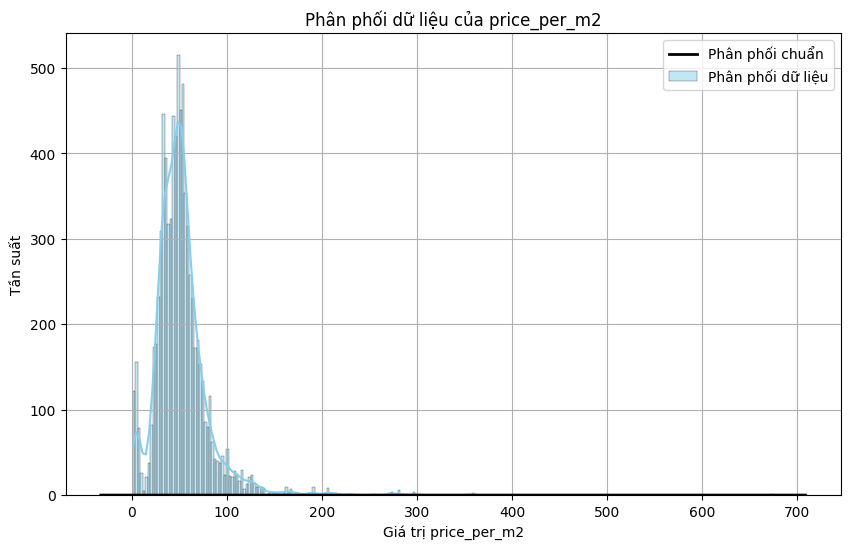

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

# Tính giá trị trung bình và phương sai của cột 'price_per_m2'
mean_value = dataset_df['price_per_m2'].mean()
std_dev = dataset_df['price_per_m2'].std()

# Vẽ biểu đồ histogram
plt.figure(figsize=(10, 6))
sns.histplot(dataset_df['price_per_m2'], kde=True, color='skyblue', label='Phân phối dữ liệu')

# Vẽ đường phân phối chuẩn
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_value, std_dev)
plt.plot(x, p, 'k', linewidth=2, label='Phân phối chuẩn')

plt.title('Phân phối dữ liệu của price_per_m2')
plt.xlabel('Giá trị price_per_m2')
plt.ylabel('Tần suất')
plt.legend()
plt.grid(True)
plt.show()

dataset_df=dataset_df[(dataset_df['price_per_m2'] <120)&(dataset_df['price_per_m2'] >25) ]


In [ ]:
dataset_df['toilet'].value_counts()


toilet
2.0    5485
1.0    1079
3.0     432
Name: count, dtype: int64

In [ ]:
dataset_df['bedroom'].value_counts()

bedroom
2.0    3667
3.0    2360
1.0     663
4.0     306
Name: count, dtype: int64

In [ ]:
print(dataset_df['Tỉnh'].value_counts())


Tỉnh
Hà Nội             3675
Hồ Chí Minh        2382
Bình Dương          380
Đà Nẵng             118
Khánh Hòa            88
Bà Rịa Vũng Tàu      83
Quảng Ninh           65
Hưng Yên             58
Hải Phòng            37
Kiên Giang           24
Bình Định            21
Bắc Ninh             18
Thái Nguyên          16
Bắc Giang            13
Đồng Nai              7
Lào Cai               5
Phú Thọ               2
Hà Nội              2
Bình Thuận            1
Lâm Đồng              1
Name: count, dtype: int64


In [ ]:
print(dataset_df['Quận'].value_counts())

Quận
Nam Từ Liêm    804
Cầu Giấy       628
Quận 2         583
Thanh Xuân     543
Hà Đông        418
              ... 
Việt Trì         2
Vân Đồn          2
Phan Thiết       1
Đà Lạt           1
Hoàn Kiếm        1
Name: count, Length: 64, dtype: int64


In [ ]:
print(dataset_df['Phường'].value_counts())


Phường
Phường Mỹ Đình 2           274
Phường Thanh Xuân Trung    241
Phường Thạnh Mỹ Lợi        233
Phường Nhân Chính          205
Phường An Phú              188
                          ... 
Phường Phước Long            1
Phườn Thạnh Mỹ Lợi           1
Phường Phước Long A          1
Phường Hòa Phú               1
Phường Trần Hưng Đạo       1
Name: count, Length: 251, dtype: int64


In [ ]:
dataset_df['Đường'].value_counts()


Đường
Đường Bến Vân Đồn        266
Đường Tố Hữu             216
Đường Phạm Văn Đồng      142
Đường Lê Văn Lương       140
Phố Trần Bình            138
                        ... 
Đường Hoàng Trọng Mậu      1
Đường Phạm Đức Sơn         1
Đường La Thành             1
Đường Mạc Thái Tông        1
Đường Lò Lu                1
Name: count, Length: 432, dtype: int64

In [ ]:
dataset_df.head()

,title,links,price,area,price_per_m2,bedroom,toilet,location,description,balcony_direction,house_direction,property_legal_document,furniture,date_submitted,Tỉnh,Quận,Phường,Đường
0,"Bán CH có sân Sky Garden 2 Phú Mỹ Hưng Q. 7, D...",https://batdongsan.com.vn/ban-can-ho-chung-cu-...,"5,7 tỷ",131.0,43.51,2.0,2.0,"[['Dự án Sky Garden 3', ' Đường Phạm Văn Nghị...","Bán căn hộ có sân tại Sky garden 2, diện tích ...",Bắc,Nam,Sổ hồng cầm tay.,Full nội thất.,11/04/2024,Hồ Chí Minh,Quận 7,Phường Tân Phong,Đường Phạm Văn Nghị
1,"Chủ ngợp bán Him Lam, 86m2, 2PN 2WC, full nội ...",https://batdongsan.com.vn/ban-can-ho-chung-cu-...,"3,25 tỷ",86.0,37.79,2.0,2.0,"[['Dự án Him Lam Chợ Lớn', ' Đường Hậu Giang'...","Cần bán chung cư Him Lam, Q6 diện tích 86m², 2...",Đông - Nam,Đông,Sổ đỏ/ Sổ hồng,Đầy đủ,17/04/2024,Hồ Chí Minh,Quận 6,Phường 11,Đường Hậu Giang
2,"Bán căn hộ Flemington, Q11, 87m2, 2 phòng ngủ,...",https://batdongsan.com.vn/ban-can-ho-chung-cu-...,"4,6 tỷ",87.0,52.87,2.0,2.0,"[['The Flemington', ' 184', ' Đường Lê Đại H...","Bán căn hộ Flemington, địa chỉ: 184 Lê Đại Hàn...",Đông - Nam,Đông,Sổ đỏ/ Sổ hồng,Đầy đủ,17/04/2024,Hồ Chí Minh,Quận 11,Phường 15,Đường Lê Đại Hành
4,"Tôi chính chủ bán căn hộ 134m, 4 ngủ, 3vs tại ...",https://batdongsan.com.vn/ban-can-ho-chung-cu-...,"9,5 tỷ",134.0,70.90,4.0,3.0,"[['Dự án The Park Home', ' Đường Thành Thái',...",Tôi chính chủ bán căn hộ 134m tại dự án The Pa...,Đông - Bắc,Tây - Nam,Sổ đỏ/ Sổ hồng,Đầy đủ,17/04/2024,Hà Nội,Cầu Giấy,Phường Dịch Vọng,Đường Thành Thái
6,"Bán gấp căn hộ 80m2, 2 phòng ngủ, 2WC, nhà mới...",https://batdongsan.com.vn/ban-can-ho-chung-cu-...,5 tỷ,80.0,62.50,2.0,2.0,"[['Dự án Eco Green Sài Gòn', ' Đường Nguyễn V...",ECOGREENSAIGON mua ở hoặc đầu tư đều tốt.\nBán...,Đông,Bắc,Hợp đồng mua bán,Cơ bản,08/04/2024,Hồ Chí Minh,Quận 7,Phường Tân Thuận Tây,Đường Nguyễn Văn Linh


In [ ]:
dataset_df=dataset_df[(dataset_df['Tỉnh'] =='Hà Nội')|(dataset_df['Tỉnh'] =='Hồ Chí Minh') ]


len(dataset_df)

6057

In [ ]:
numerical_cols = ['price_per_m2','area', 'bedroom', 'toilet']  # thay thế các giá trị thực tế của bạn
categorical_cols = [ 'house_direction','property_legal_document','Đường','Quận','Tỉnh','Phường']  # thay thế các giá trị thực tế của bạn

#
my_cols=categorical_cols+numerical_cols
dataset_df_1 = dataset_df[my_cols]

dataset_df_2=pd.read_csv('/content/dataset_nha_tot.csv')
# dataset_df_2=dataset_df_1.drop('date_submitted',axis=1)

dataset_df = pd.concat([dataset_df_1,dataset_df_2])

In [ ]:
len(dataset_df_1)

6057

In [ ]:
dataset_df_2.head()

,house_direction,property_legal_document,Đường,Tỉnh,Phường,price_per_m2,area,bedroom,toilet
0,Đông Bắc,Sổ hồng riêng,Đại Mỗ,Hà Nội,Phường Tây Mỗ,56.98,43.0,1.0,1
1,Đông Bắc,Sổ hồng riêng,Đại Mỗ,Hà Nội,Phường Tây Mỗ,56.98,43.0,1.0,1
2,Đông Bắc,Sổ hồng riêng,Đại Mỗ,Hà Nội,Phường Tây Mỗ,56.98,43.0,1.0,1
3,Bắc,Sổ hồng riêng,Phố Dương Đình Nghệ,Hà Nội,Phường Yên Hoà,43.64,110.0,3.0,2
4,Tây Bắc,Sổ hồng riêng,Bát Nàn,Hồ Chí Minh,Phường Thạnh Mỹ Lợi (Quận 2 cũ),64.38,73.0,2.0,2


In [ ]:
len(dataset_df)

9798

In [ ]:

# dataset_df['furniture'] = dataset_df['furniture'].replace('Full nội thất', 'Cao cấp', regex=False)
# dataset_df['furniture'] = dataset_df['furniture'].replace('Nội thất đầy đủ về ở được ngay.', 'Cao cấp', regex=False)
# dataset_df['furniture'] = dataset_df['furniture'].replace('Full nội thất.', 'Cao cấp', regex=False)
# dataset_df['furniture'] = dataset_df['furniture'].replace('Full', 'Cao cấp', regex=False)
# dataset_df['furniture'] = dataset_df['furniture'].replace('Full.', 'Cao cấp', regex=False)



# dataset_df['furniture'] = dataset_df['furniture'].replace('Cơ bản.', 'Cơ bản', regex=False)
# dataset_df['furniture'] = dataset_df['furniture'].replace('Nội thất cơ bản.', 'Cơ bản', regex=False)
# dataset_df['furniture'] = dataset_df['furniture'].replace('Cơ bản.', 'Cơ bản', regex=False)
# dataset_df['furniture'] = dataset_df['furniture'].replace('Nội thất cơ bản', 'Cơ bản', regex=False)
# dataset_df['furniture'] = dataset_df['furniture'].replace('Full nội thất cơ bản.', 'Cơ bản', regex=False)
# dataset_df['furniture'] = dataset_df['furniture'].replace('Đầy đủ nội thất cơ bản.', 'Cơ bản', regex=False)
# dataset_df['furniture'] = dataset_df['furniture'].replace('Cơ bản chủ đầu tư', 'Cơ bản', regex=False)

# dataset_df['furniture'] = dataset_df['furniture'].replace('Nội thất đầy đủ.', 'Cao cấp', regex=False)
# dataset_df['furniture'] = dataset_df['furniture'].replace('Đầy đủ', 'cao cấp', regex=False)

# dataset_df['furniture'] = dataset_df['furniture'].replace('Đầy đủ.', 'cao cấp', regex=False)
# dataset_df['furniture'] = dataset_df['furniture'].replace('Cao cấp', 'Cao cấp', regex=False)
# dataset_df['furniture'] = dataset_df['furniture'].replace('Cao cấp.', 'Cao cấp', regex=False)
# dataset_df['furniture'] = dataset_df['furniture'].replace('Full nội thất cao cấp', 'Cao cấp', regex=False)

# dataset_df['furniture'] = dataset_df['furniture'].replace('cao cấp', 'Cao cấp', regex=False)

# dataset_df['furniture'] = dataset_df['furniture'].replace('Cao cấp, đầy đủ', 'Cao cấp', regex=False)
# dataset_df['furniture'] = dataset_df['furniture'].replace('Nội thất cao cấp', 'Cao cấp', regex=False)
# dataset_df['furniture'] = dataset_df['furniture'].replace('Nội thất đầy đủ', 'Cao cấp', regex=False)
# dataset_df['furniture'] = dataset_df['furniture'].replace('Nội thất cao cấp.', 'Cao cấp', regex=False)
# dataset_df['furniture'] = dataset_df['furniture'].replace('Đầy đủ nội thất.', 'Cao cấp', regex=False)
# dataset_df['furniture'] = dataset_df['furniture'].replace('Full nội thất cao cấp.', 'Cao cấp', regex=False)
# dataset_df['furniture'] = dataset_df['furniture'].replace('Cao cấp.', 'Cao cấp', regex=False)
# dataset_df['furniture'] = dataset_df['furniture'].replace('Nội thất đẹp.', 'Cao cấp', regex=False)
# dataset_df['furniture'] = dataset_df['furniture'].replace('Đẹp sang trọng', 'Cao cấp', regex=False)
# dataset_df['furniture'] = dataset_df['furniture'].replace('Đầy đủ nội thất cao cấp.', 'Cao cấp', regex=False)

# dataset_df['furniture'] = dataset_df['furniture'].replace('Không nội thất.', 'Không nội thất', regex=False)
# dataset_df['furniture'] = dataset_df['furniture'].replace('Thô', 'Không nội thất', regex=False)


In [ ]:
# Tính toán tần suất lặp lại của mỗi giá trị trong cột 'Phường'
value_counts = dataset_df['Phường'].value_counts()

# Lấy ra danh sách các giá trị có tần suất lặp lại nhỏ hơn 20
values_to_drop = value_counts[value_counts < 20].index

# Lọc các hàng chứa các giá trị có tần suất lặp lại nhỏ hơn 20
dataset_df = dataset_df[~dataset_df['Phường'].isin(values_to_drop)]


In [ ]:
len(dataset_df)

8143

In [ ]:
print(dataset_df['Phường'].value_counts())

Phường
Phường Mỹ Đình 2                     274
Phường Thanh Xuân Trung              241
Phường Thạnh Mỹ Lợi                  233
Phường Nhân Chính                    205
 Phường Long Thạnh Mỹ (Quận 9 cũ)    196
                                    ... 
 Phường Trung Mỹ Tây                  20
 Phường Bách Khoa                     20
Phường Hòa Thạnh                      20
 Phường Cổ Nhuế 1                     20
 Phường An Lạc A                      20
Name: count, Length: 132, dtype: int64


In [ ]:
# print(dataset_df['furniture'].value_counts())

In [ ]:
# dataset_df=dataset_df[(dataset_df['furniture'] =='Cao cấp')|(dataset_df['furniture'] =='Cơ bản') ]


In [ ]:

dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Sổ đỏ/ Sổ hồng.', 'Sổ đỏ/ Sổ hồng', regex=False)
dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Sổ hồng', 'Sổ đỏ/ Sổ hồng', regex=False)
dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Sổ đỏ', 'Sổ đỏ/ Sổ hồng', regex=False)

dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Đã có sổ hồng', 'Sổ đỏ/ Sổ hồng', regex=False)
dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Đã có sổ hồng.', 'Sổ đỏ/ Sổ hồng', regex=False)

dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Sổ hồng riêng', 'Sổ đỏ/ Sổ hồng', regex=False)


dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Sổ đỏ.', 'Sổ đỏ/ Sổ hồng', regex=False)
dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Đã có sổ hồng.', 'Sổ đỏ/ Sổ hồng', regex=False)

dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Sổ đỏ chính chủ.', 'Sổ đỏ/ Sổ hồng', regex=False)
dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Sổ hồng.', 'Sổ đỏ/ Sổ hồng', regex=False)
dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Đã có sổ hồng.', 'Sổ đỏ/ Sổ hồng', regex=False)
dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Đã có sổ', 'Sổ đỏ/ Sổ hồng', regex=False)
dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Có sổ hồng.', 'Sổ đỏ/ Sổ hồng', regex=False)
dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Có sổ', 'Sổ đỏ/ Sổ hồng', regex=False)
dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Có sổ.', 'Sổ đỏ/ Sổ hồng', regex=False)
dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Đã có sổ đỏ chính chủ.', 'Sổ đỏ/ Sổ hồng', regex=False)
dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Đã có sổ đỏ', 'Sổ đỏ/ Sổ hồng', regex=False)
dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Đã có', 'Sổ đỏ/ Sổ hồng', regex=False)
dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Sổ hồng lâu dài', 'Sổ đỏ/ Sổ hồng', regex=False)

dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Hợp đồng mua bán.', 'Hợp đồng mua bán', regex=False)



dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Đang chờ sổ.', 'Đang chờ sổ', regex=False)
dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Đang chờ bàn giao sổ.', 'Đang chờ sổ', regex=False)



In [ ]:
print(dataset_df['property_legal_document'].value_counts())

property_legal_document
Sổ đỏ/ Sổ hồng                                                                      5427
Hợp đồng mua bán                                                                    1811
Đang chờ sổ                                                                          491
Hợp đồng đặt cọc.                                                                     14
Sổ đỏ/sổ hồng.                                                                         7
                                                                                    ... 
* Hỗ trợ thủ tục pháp lý sang tên sổ đỏ cho quý khách đến khi ra tên khách hàng.       1
Sẵn sổ.                                                                                1
Giai đoạn 1 của Akari City đang làm sổ                                                 1
Đã tiếp nhận thông tin làm sổ.                                                         1
Sổ đỏ cầm tay - sẵn sàng giao dịch.                                                   

In [ ]:
dataset_df=dataset_df[(dataset_df['property_legal_document'] =='Sổ đỏ/ Sổ hồng')|(dataset_df['property_legal_document'] =='Hợp đồng mua bán')|(dataset_df['property_legal_document'] =='Đang chờ sổ') ]
dataset_df.head()

,house_direction,property_legal_document,Đường,Quận,Tỉnh,Phường,price_per_m2,area,bedroom,toilet
4,Tây - Nam,Sổ đỏ/ Sổ hồng,Đường Thành Thái,Cầu Giấy,Hà Nội,Phường Dịch Vọng,70.90,134.0,4.0,3.0
6,Bắc,Hợp đồng mua bán,Đường Nguyễn Văn Linh,Quận 7,Hồ Chí Minh,Phường Tân Thuận Tây,62.50,80.0,2.0,2.0
8,Tây - Nam,Sổ đỏ/ Sổ hồng,Đường Trần Kim Xuyến,Cầu Giấy,Hà Nội,Phường Yên Hòa,69.56,115.0,3.0,2.0
10,Đông - Nam,Sổ đỏ/ Sổ hồng,Đường Lê Văn Lương,Thanh Xuân,Hà Nội,Phường Nhân Chính,69.30,100.0,3.0,2.0
11,Đông - Nam,Sổ đỏ/ Sổ hồng,Đường Nguyễn Tuân,Thanh Xuân,Hà Nội,Phường Thanh Xuân Trung,73.79,725.0,2.0,2.0


In [ ]:
print(dataset_df['property_legal_document'].value_counts())

property_legal_document
Sổ đỏ/ Sổ hồng      5427
Hợp đồng mua bán    1811
Đang chờ sổ          491
Name: count, dtype: int64


In [ ]:
print(dataset_df['Quận'].value_counts())

Quận
Nam Từ Liêm        705
Cầu Giấy           606
Quận 2             496
Thanh Xuân         442
Hà Đông            355
Quận 7             344
Quận 4             272
Bắc Từ Liêm        194
Hoàng Mai          183
Gia Lâm            154
Bình Thạnh         140
Hai Bà Trưng       110
Long Biên          103
Quận 9              91
Quận 10             80
Bình Chánh          66
Đông Anh            61
Quận 8              58
Tân Phú             57
Thủ Đức             56
Thanh Trì           54
Bình Tân            51
Nhà Bè              34
Phú Nhuận           26
Tây Hồ              20
Quận 6              14
Tân Bình            12
Gò Vấp               9
Quận Bình Thạnh      6
Quận 5               2
Quận 3               2
Name: count, dtype: int64


In [ ]:
# print(dataset_df['balcony_direction'].value_counts())

In [ ]:
mean_value

51.84524660291898

In [ ]:
print(dataset_df['Tỉnh'].value_counts())

Tỉnh
Hồ Chí Minh    4045
Hà Nội         3684
Name: count, dtype: int64


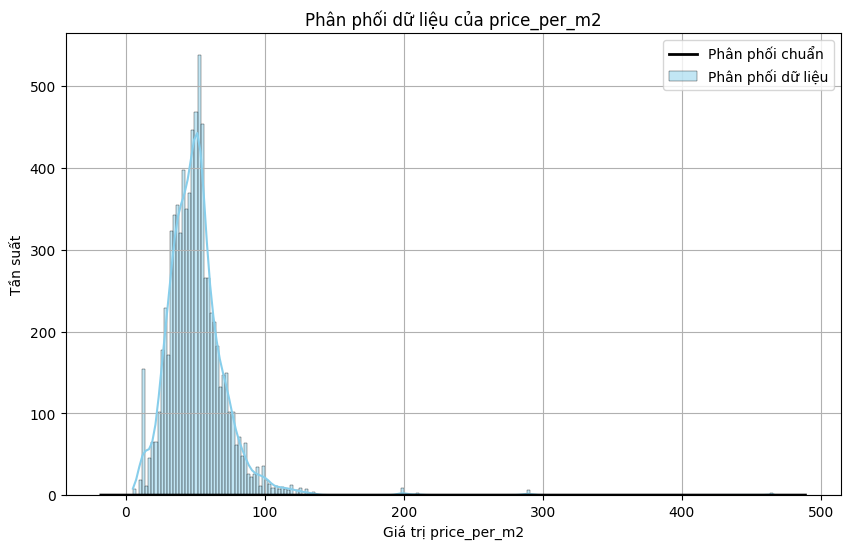

In [ ]:

# Tính giá trị trung bình và phương sai của cột 'price_per_m2'
mean_value = dataset_df['price_per_m2'].mean()
std_dev = dataset_df['price_per_m2'].std()

# Vẽ biểu đồ histogram
plt.figure(figsize=(10, 6))
sns.histplot(dataset_df['price_per_m2'], kde=True, color='skyblue', label='Phân phối dữ liệu')

# Vẽ đường phân phối chuẩn
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_value, std_dev)
plt.plot(x, p, 'k', linewidth=2, label='Phân phối chuẩn')

plt.title('Phân phối dữ liệu của price_per_m2')
plt.xlabel('Giá trị price_per_m2')
plt.ylabel('Tần suất')
plt.legend()
plt.grid(True)
plt.show()

dataset_df=dataset_df[(dataset_df['price_per_m2'] <110)&(dataset_df['price_per_m2'] >25) ]

In [ ]:
dataset_df=dataset_df[(dataset_df['Tỉnh'] =='Hà Nội')]


In [ ]:
len(dataset_df)

3480

In [ ]:
mean_value = dataset_df['price_per_m2'].mean()

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder  # Assuming you also need OrdinalEncoder

my_cols=['area', 'bedroom', 'toilet',	'house_direction',	'property_legal_document','Đường','Phường','Tỉnh',	'Quận']

y = dataset_df['price_per_m2']
X = dataset_df.drop('price_per_m2', axis=1)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train[my_cols]
X_test = X_test[my_cols]



# Tạo các pipeline xử lý dữ liệu
numerical_cols = ['area']  # thay thế các giá trị thực tế của bạn
categorical_cols_1=['bedroom', 'toilet','house_direction','property_legal_document','Đường','Tỉnh',	'Quận',	'Phường']


numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# First categorical transformer with OneHotEncoder
categorical_transformer_1 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat_1', categorical_transformer_1, categorical_cols_1),

    ]
)



# numerical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='median')),
#     ('scaler', StandardScaler())
# ])

# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])




# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numerical_transformer, numerical_cols),
#         ('cat', categorical_transformer, categorical_cols)
#     ]
# )

# Định nghĩa lại my_pipeline với một RandomForestRegressor mặc định



my_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Function to create the model with hyperparameter space
# Define the parameter distribution
param_dist = {
    'model__n_estimators': randint(240, 300),
    'model__max_depth': randint(5, 8),
    'model__min_samples_split': randint(2, 5)
}

# Create a RandomizedSearchCV object and fit it to the training data
random_search = RandomizedSearchCV(
    estimator=my_pipeline,
    param_distributions=param_dist,
    n_iter=100,
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)


In [ ]:
random_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", random_search.best_params_)

# Your best model is now fitted with the best set of hyperparameters
best_model = random_search.best_estimator_

# Use the best model to make predictions
val_preds = best_model.predict(X_test)
print("Validation MAE: ", mean_absolute_error(y_test, val_preds))
# Best parameters found:  {'model__max_depth': 7, 'model__min_samples_split': 2, 'model__n_estimators': 223}


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found:  {'model__max_depth': 7, 'model__min_samples_split': 2, 'model__n_estimators': 276}
Validation MAE:  6.934833106370364


In [ ]:
joblib.dump(best_model, 'model_chung_cu_Ha_Noi')

['model_chung_cu_Ha_Noi']